**PRACTICA DE LABORATORIO - REGRECION MULTIVARIABLE** ♈

*   ***IMPORTANDO LIBRERIAS***
*   ***CARGANDO LOS ARCHIVOS(DATOS)***
*Maykol Mulluni Candia*
Ⓜ


In [2]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
np.set_printoptions(precision=5)

# FORMA 1 
# **Modificando Manualmente datos en EXEL**



In [3]:
#Datos dados valores manualmente en el cars_dataset.xlsx
dat = pd.read_excel('cars_dataset.xlsx', )
dat.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,1,2,23.40,1248,74,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,0,1,2,21.14,1498,103.52,5
2,Honda City 2017-2020 EXi,2006,158000,140000,0,0,1,1,17.70,1497,78,5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,1,2,23.00,1396,90,5
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,1,2,16.10,1298,88.2,5


In [4]:
d_set = dat.drop(['name', 'max_power'], axis = 1)
d_set.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,0.571973,0.196604,0.870817,1.889518,19.418816,1458.635212,5.405389
std,4.044249,8.062534e+05,5.655055e+04,0.544319,0.464810,0.335423,0.377278,3.981875,497.017508,0.948874
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,0.000000,0.000000,1.000000,2.000000,16.800000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,0.000000,1.000000,2.000000,19.420000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,1.000000,0.000000,1.000000,2.000000,22.277500,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3.000000,2.000000,1.000000,3.000000,42.000000,3604.000000,14.000000


In [5]:
normalisacion = (d_set - d_set.min())/(d_set.max() - d_set.min())
normalisacion

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
0,0.837838,0.042126,0.061640,0.333333,0.0,1.0,0.666667,0.557143,0.209396,0.25
1,0.837838,0.034102,0.050837,0.333333,0.0,1.0,0.666667,0.503333,0.293289,0.25
2,0.621622,0.012839,0.059310,0.000000,0.0,1.0,0.333333,0.421429,0.292953,0.25
3,0.729730,0.019559,0.053803,0.333333,0.0,1.0,0.666667,0.547619,0.259060,0.25
4,0.648649,0.010030,0.050837,0.000000,0.0,1.0,0.666667,0.383333,0.226174,0.25
...,...,...,...,...,...,...,...,...,...,...
8123,0.810811,0.029087,0.046601,0.000000,0.0,1.0,0.666667,0.440476,0.192282,0.25
8124,0.648649,0.010532,0.050414,0.333333,0.0,1.0,0.000000,0.400000,0.291611,0.25
8125,0.702703,0.035306,0.050837,0.333333,0.0,1.0,0.666667,0.459524,0.209396,0.25
8126,0.810811,0.026078,0.010591,0.333333,0.0,1.0,0.666667,0.561190,0.259060,0.25


In [6]:
normalisacion.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,seats
count,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000,8128.000000
mean,0.832541,0.061010,0.029578,0.190658,0.098302,0.870817,0.629839,0.462353,0.280079,0.283782
std,0.109304,0.080868,0.023957,0.181440,0.232405,0.335423,0.125759,0.094807,0.166784,0.079073
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.756757,0.022568,0.014827,0.000000,0.000000,1.000000,0.666667,0.400000,0.192282,0.250000
50%,0.864865,0.042126,0.025418,0.333333,0.000000,1.000000,0.666667,0.462381,0.209396,0.250000
75%,0.918919,0.064694,0.041517,0.333333,0.000000,1.000000,0.666667,0.530417,0.321477,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# FORMA 2
#***Modificando datos con libreria SKLEARM***

In [7]:
n_datos = pd.read_excel("cars_dataset2.xlsx")
n_datos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,450000
1,2014,5.0,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,370000
2,2006,5.0,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,158000
3,2010,5.0,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,225000
4,2007,5.0,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,290000


In [8]:
n_datos.isnull().sum()

year               0
seats            221
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
selling_price      0
dtype: int64

In [9]:
# Se tratara los datos
le = preprocessing.LabelEncoder()
n_datos["fuel"] = le.fit_transform(n_datos["fuel"])
n_datos["seller_type"] = le.fit_transform(n_datos["seller_type"])
n_datos["transmission"] = le.fit_transform(n_datos["transmission"])
n_datos["owner"] = le.fit_transform(n_datos["owner"])
n_datos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,1,1,1,0,23.40,1248.0,74.00,450000
1,2014,5.0,120000,1,1,1,2,21.14,1498.0,103.52,370000
2,2006,5.0,140000,3,1,1,4,17.70,1497.0,78.00,158000
3,2010,5.0,127000,1,1,1,0,23.00,1396.0,90.00,225000
4,2007,5.0,120000,3,1,1,0,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,3,1,1,0,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,1,1,1,1,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,1,1,1,0,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,1,1,1,0,23.57,1396.0,70.00,290000


In [10]:
# Reemplazar datos NaN con el valor promedio de cada una de las columnas
n_datos = n_datos.fillna(n_datos.mean()) 
n_datos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,2014,5.0,145500,1,1,1,0,23.40,1248.0,74.00,450000
1,2014,5.0,120000,1,1,1,2,21.14,1498.0,103.52,370000
2,2006,5.0,140000,3,1,1,4,17.70,1497.0,78.00,158000
3,2010,5.0,127000,1,1,1,0,23.00,1396.0,90.00,225000
4,2007,5.0,120000,3,1,1,0,16.10,1298.0,88.20,130000
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,5.0,110000,3,1,1,0,18.50,1197.0,82.85,320000
8124,2007,5.0,119000,1,1,1,1,16.80,1493.0,110.00,135000
8125,2009,5.0,120000,1,1,1,0,19.30,1248.0,73.90,382000
8126,2013,5.0,25000,1,1,1,0,23.57,1396.0,70.00,290000


In [11]:
n_datos.isnull().sum()

year             0
seats            0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
selling_price    0
dtype: int64

In [12]:
#Normalisamos los datos
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

datos_normalizados = mean_norm(n_datos)
print(datos_normalizados)

          year     seats  km_driven      fuel  seller_type  transmission  \
0     0.047977 -0.440093   1.338389 -0.889557      0.27759      0.385135   
1     0.047977 -0.440093   0.887458 -0.889557      0.27759      0.385135   
2    -1.931485 -0.440093   1.241129  1.106115      0.27759      0.385135   
3    -0.941754 -0.440093   1.011243 -0.889557      0.27759      0.385135   
4    -1.684052 -0.440093   0.887458  1.106115      0.27759      0.385135   
...        ...       ...        ...       ...          ...           ...   
8123 -0.199456 -0.440093   0.710622  1.106115      0.27759      0.385135   
8124 -1.684052 -0.440093   0.869775 -0.889557      0.27759      0.385135   
8125 -1.189187 -0.440093   0.887458 -0.889557      0.27759      0.385135   
8126 -0.199456 -0.440093  -0.792481 -0.889557      0.27759      0.385135   
8127 -0.199456 -0.440093  -0.792481 -0.889557      0.27759      0.385135   

         owner   mileage    engine  max_power  selling_price  
0    -0.666598  0.999676

In [13]:
normalisado_datos = pd.read_excel("normalisado_cars_dataset.xlsx")
normalisado_datos

,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,selling_price
0,0.047977,-0.440093,1.338389,-0.889557,0.27759,0.385135,-0.666598,0.999676,-0.423846,-0.035656,-0.233507
1,0.047977,-0.440093,0.887458,-0.889557,0.27759,0.385135,0.970540,0.431974,0.079180,-0.026374,-0.332731
2,-1.931485,-0.440093,1.241129,1.106115,0.27759,0.385135,2.607678,-0.432138,0.077168,-0.034398,-0.595675
3,-0.941754,-0.440093,1.011243,-0.889557,0.27759,0.385135,-0.666598,0.899198,-0.126054,-0.030625,-0.512575
4,-1.684052,-0.440093,0.887458,1.106115,0.27759,0.385135,-0.666598,-0.834051,-0.323241,-0.031191,-0.630403
...,...,...,...,...,...,...,...,...,...,...,...
8123,-0.199456,-0.440093,0.710622,1.106115,0.27759,0.385135,-0.666598,-0.231182,-0.526464,-0.032873,-0.394746
8124,-1.684052,-0.440093,0.869775,-0.889557,0.27759,0.385135,0.151971,-0.658214,0.069120,-0.024336,-0.624202
8125,-1.189187,-0.440093,0.887458,-0.889557,0.27759,0.385135,-0.666598,-0.030225,-0.423846,-0.035688,-0.317848
8126,-0.199456,-0.440093,-0.792481,-0.889557,0.27759,0.385135,-0.666598,1.042379,-0.126054,-0.036914,-0.431955


# Trabajando con las dos formas en los datos

# Forma 1

In [14]:
x_train = np.array(normalisacion.drop(['selling_price'], axis = 1))
y_train = np.array(normalisacion.iloc[:, 1:2].values)
x_train
y_train

array([[0.04213],
       [0.0341 ],
       [0.01284],
       ...,
       [0.03531],
       [0.02608],
       [0.02608]])

In [15]:
b_init = 700.00
w_init = np.array([ 0.3252525, 0.5624164, 0.3401242, 0.5000001, 0.5111000, 0.4242421, 0.3233331, 0.500011, 0.7171711])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (9,), b_init type: <class 'float'>


# FORMA 2

In [16]:
X_train_2 = normalisado_datos.iloc[:,:10]
y_train_2 = normalisado_datos["selling_price"]
X_train_2


,year,seats,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power
0,0.047977,-0.440093,1.338389,-0.889557,0.27759,0.385135,-0.666598,0.999676,-0.423846,-0.035656
1,0.047977,-0.440093,0.887458,-0.889557,0.27759,0.385135,0.970540,0.431974,0.079180,-0.026374
2,-1.931485,-0.440093,1.241129,1.106115,0.27759,0.385135,2.607678,-0.432138,0.077168,-0.034398
3,-0.941754,-0.440093,1.011243,-0.889557,0.27759,0.385135,-0.666598,0.899198,-0.126054,-0.030625
4,-1.684052,-0.440093,0.887458,1.106115,0.27759,0.385135,-0.666598,-0.834051,-0.323241,-0.031191
...,...,...,...,...,...,...,...,...,...,...
8123,-0.199456,-0.440093,0.710622,1.106115,0.27759,0.385135,-0.666598,-0.231182,-0.526464,-0.032873
8124,-1.684052,-0.440093,0.869775,-0.889557,0.27759,0.385135,0.151971,-0.658214,0.069120,-0.024336
8125,-1.189187,-0.440093,0.887458,-0.889557,0.27759,0.385135,-0.666598,-0.030225,-0.423846,-0.035688
8126,-0.199456,-0.440093,-0.792481,-0.889557,0.27759,0.385135,-0.666598,1.042379,-0.126054,-0.036914


In [17]:
y_train_2

0      -0.233507
1      -0.332731
2      -0.595675
3      -0.512575
4      -0.630403
          ...   
8123   -0.394746
8124   -0.624202
8125   -0.317848
8126   -0.431955
8127   -0.431955
Name: selling_price, Length: 8128, dtype: float64

In [18]:
b_init_2 = 75.18113679940
w_init_2 = np.array([ 0.34251783, -0.1118112 , -0.23304738, -0.15846624, -0.25008277,
       -0.42419281, -0.00962021,  0.01996006,  0.68120436, -0.04877944])

print(f"w_init shape: {w_init_2.shape}, b_init type: {type(b_init_2)}")

w_init shape: (10,), b_init type: <class 'float'>


# CREAMOS FUNCION PARA PREDECIR EL PRECIO

## 1. Modelo de Regresión Lineal con múltiples variables
La predicción del modelo con múltiples variables viene dada por el modelo lineal:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
o en la notación vectorial:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector **dot product(producto punto)**

Para demostrar el producto punto, implementaremos la predicción usando (1) y (2).

In [19]:
# Predicción única elemento por elemento
def predict_single_loop(x, w, b): 
    """   
    Args:
      x (ndarray): Shape (n,) ejemplos con múltiples características
      w (ndarray): Shape (n,) parámetro w del modelo  
      b (scalar):  parámetro b del modelo    
      
    Returns:
      p (scalar):  predicción
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [70]:
def predict(x, w, b): 
    """   
    Args:
      x (ndarray): Shape (n,) ejemplos con múltiples características
      w (ndarray): Shape (n,) parámetro w del modelo  
      b (scalar):  parámetro b del modelo    
      
    Returns:
      p (scalar):  predicción
    """
    p = np.dot(x, w) + b     
    return p 

## 2. Función Costo

La ecuación para la función costo de múltiples variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
Donde:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 



In [21]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros w del modelo
      b (scalar)       : parámetro b del modelo
      
    Returns:
      cost (scalar): costo
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [22]:
def compute_cost_2(X, y, w, b): 

    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X.iloc[i].values, w) + b           #(n,)(n,) = scalar
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [23]:
cost = compute_cost(x_train, y_train, w_init, b_init) #Con un minimo de $100.00
print(f'Costo óptimo w : {cost}')

Costo óptimo w : [246083.24685]


In [24]:
cost = compute_cost_2(X_train_2, y_train_2, w_init_2, b_init_2) #Con un minimo de $100.00
print(f'Costo óptimo w : {cost}')

Costo óptimo w : 2826.400961168558


## 3. Gradiente Descendiente con múltiples variables

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

donde, n es el número de características, parámetros $w_j$,  $b$, son actualizados simultáneamente simultaneously  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m es el número de ejemplos de entrenamiento en el conjunto de datos.

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ es la predicción del modelo,  $y^{(i)}$ es la variable objetivo

## 3.1 Compute Gradient with Multiple Variables
Se implementará la ecuación (6) y (7).
- bucle externo sobre todos los m ejemplos. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ para el ejemplo se puede calcular directamente y acumular
    - en un segundo bucle sobre todas las n características:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ es calculado para cada $w_j$.

In [25]:
def compute_gradient(X, y, w, b): 
    """
    Calcula la gradiente para la regresión lineal
    Args:
      X (ndarray (m,n)): Data, m ejemplos con n características
      y (ndarray (m,)) : valores objetivo
      w (ndarray (n,)) : parámetros w del modelo 
      b (scalar)       : parámetro b del modelo
      
    Returns:
      dj_dw (ndarray (n,)): La gradiende del costo del parámetro w. 
      dj_db (scalar):       La gradiende del costo del parámetro b. 
    """
    m,n = X.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m     

    return dj_db, dj_dw

In [26]:
def compute_gradient_2(X, y, w, b): 

    m,n = X.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X.iloc[i].values, w) + b) - y[i] 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X.iloc[i, j]
            
        dj_db = dj_db + err
        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m     

    return dj_db, dj_dw

In [27]:
tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [701.54575]
dj_dw at initial w,b: 
 [584.06703  20.75202 133.77477  68.97335 610.97021 441.86813 324.36311
 196.49798 199.09541]


In [28]:
tmp_dj_db_2, tmp_dj_dw_2 = compute_gradient_2(X_train_2, y_train_2, w_init_2, b_init_2)
print(f'dj_db at initial w,b: {tmp_dj_db_2}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw_2}')

dj_db at initial w,b: 75.18113679939994
dj_dw at initial w,b: 
 [ 0.19646  0.20883 -0.11597 -0.22145 -0.1769  -0.21366 -0.10198 -0.10717
  0.32375 -0.0185 ]


## 3.2 Gradiente Descenndiente con múltiples variables
Se impementarará la ecuación (5) de arriba.

In [51]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
   Realiza descenso de gradiente por lotes para aprender w y b. Actualiza w y b tomando num_iters pasos de gradiente con tasa de aprendizaje alfa
    
    Args:
      X (ndarray (m,n))   : Data, m ejemplos con n características
      y (ndarray (m,))    : valores objetivo
      w_in (ndarray (n,)) : valor inicial del parámetro w
      b_in (scalar)       : valor inicial del parámetro b
      cost_function       : función costo
      gradient_function   : función que calcula la gradiente
      alpha (float)       : tasa de aprendizaje alfa
      num_iters (int)     : número de iteraciones para retornar la gradiente por descenso
      
    Returns:
      w (ndarray (n,)) : valor final del parámetro w
      b (scalar)       : valor final del parámetro b
      """

    J_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        dj_db,dj_dw = gradient_function(X, y, w, b)  
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        
        if i<100000:      
            J_history.append( cost_function(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}   ")
        
    return w, b, J_history 

In [52]:
def gradient_descent_2(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 

    J_history_2 = []
    w_2 = copy.deepcopy(w_in)  
    b_2 = b_in
    
    for i in range(num_iters):

        dj_db,dj_dw = gradient_function(X, y, w_2, b_2)  
        w_2 = w_2 - alpha * dj_dw               
        b_2 = b_2 - alpha * dj_db               
      
        
        if i<100000:      
            J_history_2.append( cost_function(X, y, w_2, b_2))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history_2[-1]}   ")
        
    return w_2, b_2, J_history_2 

# 4. Probando el modelo

In [53]:
# inicializando parámetros
initial_w = np.zeros_like(w_init)
initial_b = 0.
# configuración de parámetros para el algoritmo de la gradiente por descenso
iterations = 1000
alpha1 = 0.4



In [54]:
# ejecutar el algoritmo de la gradiente descendiente
ww_final, bb_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha1, iterations)

Iteration 0: Cost [0.00345]   
Iteration 100: Cost [0.00162]   
Iteration 200: Cost [0.00157]   
Iteration 300: Cost [0.00154]   
Iteration 400: Cost [0.00151]   
Iteration 500: Cost [0.00149]   
Iteration 600: Cost [0.00148]   
Iteration 700: Cost [0.00147]   
Iteration 800: Cost [0.00146]   
Iteration 900: Cost [0.00146]   


In [116]:
initial_w_2 = np.zeros_like(w_init_2)
alpha = 0.4
iterations_2 = 100
# ejecutar el algoritmo de la gradiente descendiente
w_final, b_final, J_hist_2 = gradient_descent_2(X_train_2, y_train_2, initial_w_2, initial_b,
                                                    compute_cost_2, compute_gradient_2, 
                                                    alpha, iterations_2)

Iteration 0: Cost 0.24986747078033633   
Iteration 10: Cost 0.2092565424450561   
Iteration 20: Cost 0.2078915494850747   
Iteration 30: Cost 0.2076394824744126   
Iteration 40: Cost 0.20758364411396743   
Iteration 50: Cost 0.20757042171945808   
Iteration 60: Cost 0.20756722191389057   
Iteration 70: Cost 0.2075664423732736   
Iteration 80: Cost 0.20756625207721346   
Iteration 90: Cost 0.2075662055953262   


# 4.1. Predicción

FORMA 1

In [117]:
d_prueba = [[0.8, 0.2 , 0.3, 0, 1, 0.75, 0.5, 0.3, 0.25]]
prueba = predict(d_prueba, ww_final, bb_final)
prueba

array([0.0402])

In [118]:
def pred(x, w, b):
    precio_real = predict(x, ww_final, bb_final) * max(dat['selling_price'])
    return precio_real


In [124]:
print(pred(d_prueba, ww_final, bb_final))

[402014.37165]


In [125]:
reg1 = LinearRegression().fit(x_train, y_train)
reg1.score(x_train, y_train)

0.5643322314262881

In [126]:
r = reg1.predict(d_prueba)
print(r * pred(d_prueba, ww_final, bb_final))

[[-420.62577]]


Forma 2

In [128]:
datos_pred = predict([[0.047977, -0.440093, 1.338389, -0.889557, 0.27759, 0.385135, -0.666598, 0.999676, -0.423846, -0.035656]] 
                       , w_final, b_final)


In [130]:
print(datos_pred)

[-0.33439]


# ***La precicion de datos de la segunda forma es mas sercano al resultado que al del inicio***
✅

# 5. Ploteando

# Forma 1

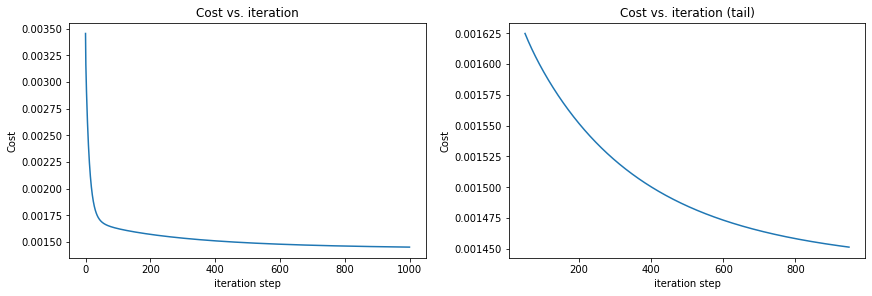

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(50 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

# Forma 2

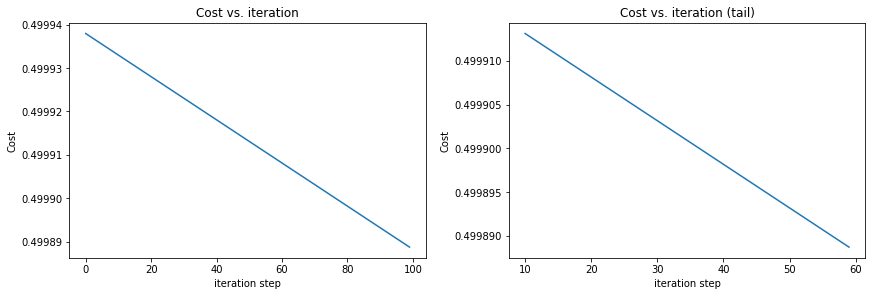

In [100]:
fig, (ax3, ax4) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax3.plot(J_hist_2)
ax4.plot(10 + np.arange(len(J_hist_2[50:])), J_hist_2[50:])
ax3.set_title("Cost vs. iteration");  ax4.set_title("Cost vs. iteration (tail)")
ax3.set_ylabel('Cost')             ;  ax4.set_ylabel('Cost') 
ax3.set_xlabel('iteration step')   ;  ax4.set_xlabel('iteration step') 
plt.show()

Otros Graficos

# Froma 1

<Figure size 360x288 with 0 Axes>

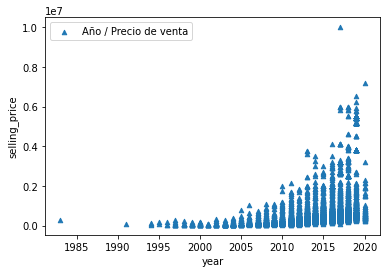

In [101]:
plt.figure(figsize = (5,4))
dat.plot("year", "selling_price", kind="scatter",marker = '^', label = 'Año / Precio de venta')
plt.show()